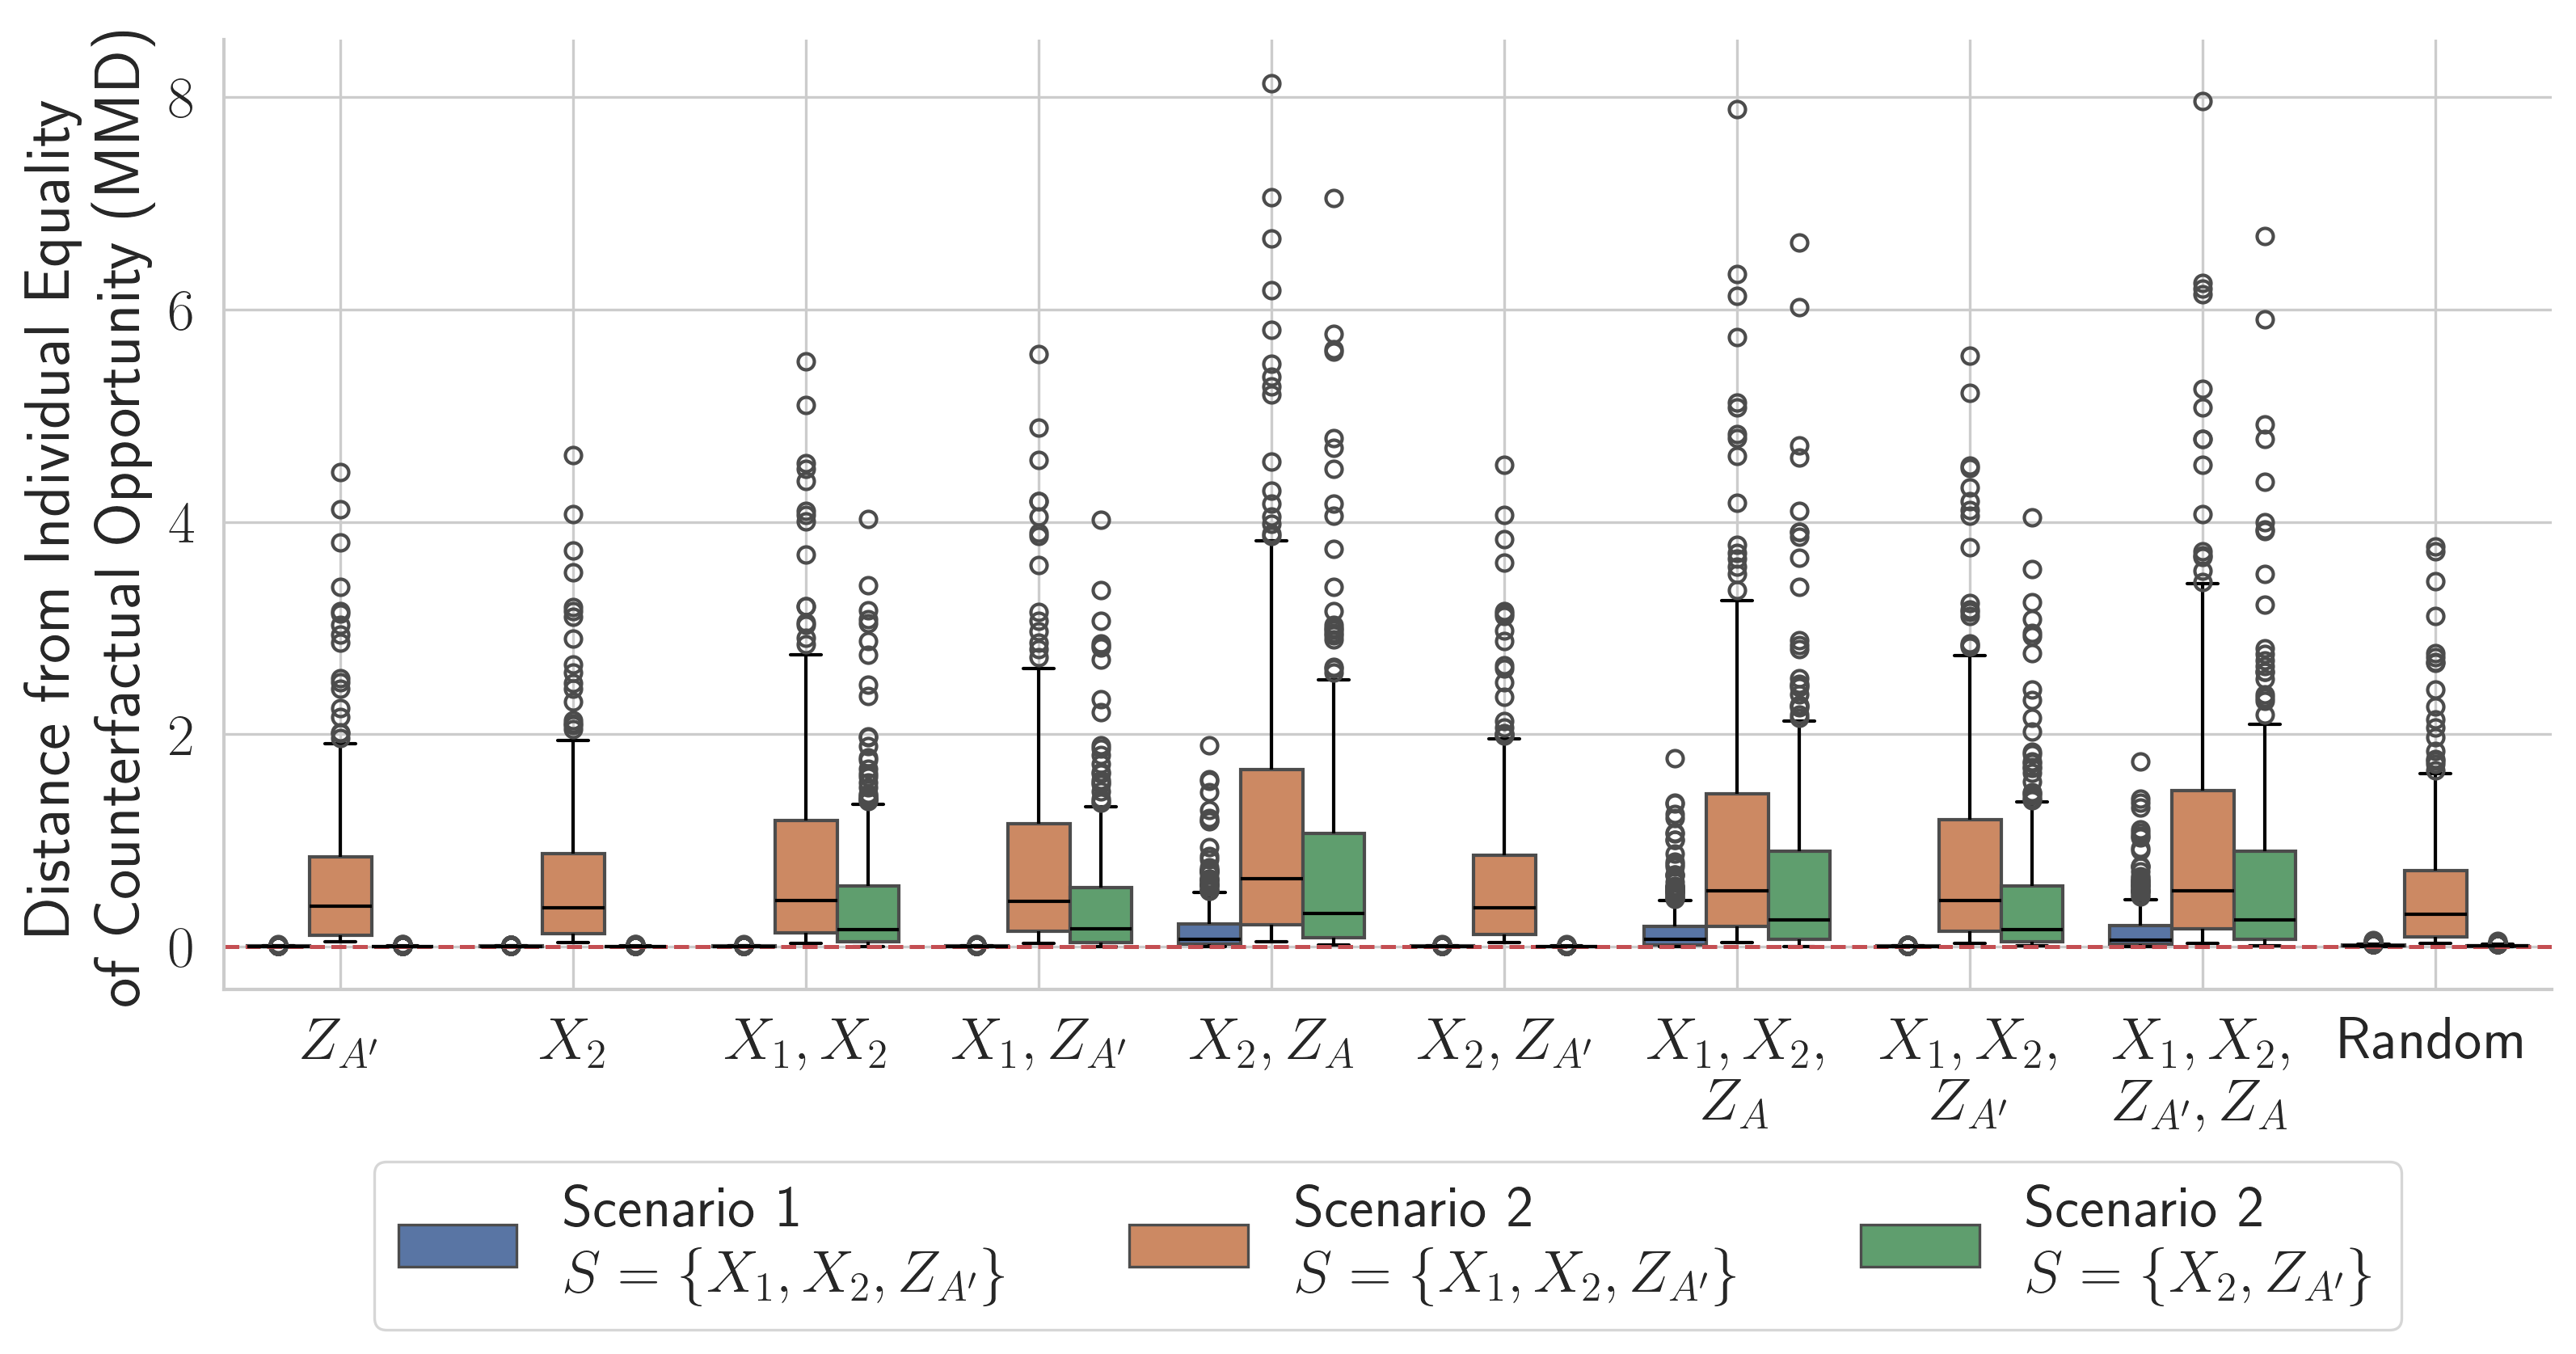

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

individual_s1_df = pd.read_csv('results/opportunity_s1_X_1,X_2,Z_A_prime,n=500,nS=1000,nL=1000.csv', header=0, index_col=0)
individual_s1_df['Scenario'] = "Scenario 1\n$S=\{X_1, X_2, Z_{A'}\}$"
individual_s1_df = individual_s1_df.drop(columns=['$X_1$', '$X_1, Z_A$'])
individual_s2a_df = pd.read_csv('results/opportunity_s2a_X_1,X_2,Z_A_prime,n=500,nS=1000,nL=1000.csv', header=0, index_col=0)
individual_s2a_df['Scenario'] = "Scenario 2\n$S=\{X_1, X_2, Z_{A'}\}$"
individual_s2b_df = pd.read_csv('results/opportunity_s2b_X_2,Z_A_prime,n=500,nS=1000,nL=1000.csv', header=0, index_col=0)
individual_s2b_df['Scenario'] = "Scenario 2\n$S=\{X_2, Z_{A'}\}$"
individual_df = pd.concat([individual_s1_df, individual_s2a_df, individual_s2b_df], axis=0)
individual_df = individual_df.melt(id_vars=['Scenario'], var_name='Model', value_name='Distance')
individual_s1_df = individual_s1_df.melt(id_vars=['Scenario'], var_name='Model', value_name='Distance')
individual_s2a_df = individual_s2a_df.melt(id_vars=['Scenario'], var_name='Model', value_name='Distance')
individual_s2b_df = individual_s2b_df.melt(id_vars=['Scenario'], var_name='Model', value_name='Distance')

plt.figure(dpi=300, figsize=(11, 6))
boxplot_settings = {
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
sns.set(rc={'text.usetex' : True}, font_scale=2, context='paper')
sns.set_style('whitegrid')
sns.boxplot(x='Model', y='Distance', hue='Scenario', orient='v', data=individual_df, **boxplot_settings)
sns.despine(right = True)
plt.axhline(y=0, linestyle='dashed', color='r')
plt.ylabel('Distance from Individual Equality\nof Counterfactual Opportunity (MMD)')
plt.xlabel('')
plt.legend(title='', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.gca().xaxis.grid(True)
plt.tight_layout()
plt.show()